In [3]:
import torch 
import torch.nn as nn 
import matplotlib.pyplot as plt
import numpy as np
import torchvision

In [1]:
# train_set = torchvision.datasets.MNIST(root="../../dataset/minist", train=True, download=True)
# test_set = torchvision.datasets.MNIST(root="../../dataset/minist", train=False, download=True)

In [4]:
import torch.nn.functional as F

In [6]:
class LogistRegressionModel(nn.Module):
    def __init__(self):
        super(LogistRegressionModel, self).__init__()
        self.linear = nn.Linear(1,1)
    def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred 

In [7]:
criterion = nn.BCELoss(size_average=False)

C:\Users\lzn\anaconda3\lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [8]:
x_data = torch.Tensor([[1.0], [2.0], [3.0]])

In [14]:
y_data = torch.Tensor([[0], [0] ,[1]])

In [15]:
model = LogistRegressionModel()

In [16]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [17]:
loss_list = []
for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    loss_list.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

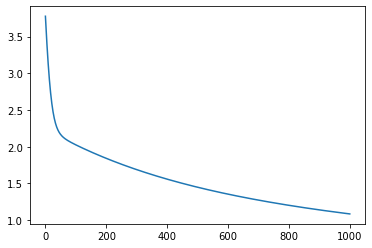

In [18]:
plt.plot(range(1000), loss_list)

C:\Users\lzn\anaconda3\lib\site-packages\torch\nn\functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


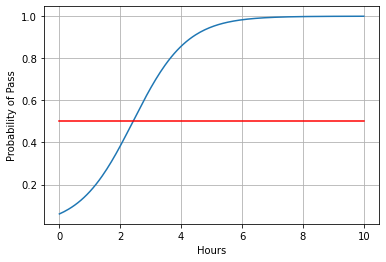

In [21]:
x = np.linspace(0, 10, 200)
x_t = torch.Tensor(x).view((200,1))
y_t = model(x_t)
y = y_t.data.numpy()
plt.plot(x, y)
plt.plot([0, 10], [0.5, 0.5], c='r')
plt.xlabel("Hours")
plt.ylabel("Probability of Pass")
plt.grid()
plt.show()